In [27]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [28]:
student_data = pd.read_csv("../Feature Analysis/feature analysis.csv")
# student_data =  student_data.drop("Race", axis= 1)

In [29]:
df_feautures = student_data.drop("Dropout", 1)

C:\Users\JOHNSO~1\AppData\Local\Temp/ipykernel_10660/2110877318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_feautures = student_data.drop("Dropout", 1)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(df_feautures)

StandardScaler()

In [34]:
scaled_features = scaler.transform(df_feautures)

In [35]:
#df_feautures = student_data.drop("Dropout", 1)

In [36]:
X = scaled_features
y = student_data['Dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Errror Rate')

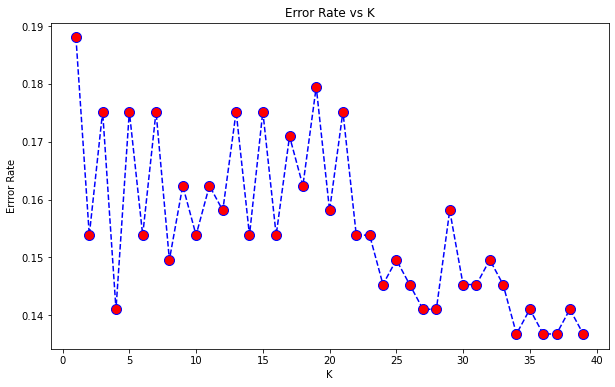

In [39]:
plt.figure(figsize= (10, 6))
plt.plot(range(1,40), error_rate,color = "blue", linestyle = 'dashed', marker = 'o', markerfacecolor ="red", markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Errror Rate')

In [40]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('/n')
print(classification_report(y_test, pred))

[[196   6]
 [ 26   6]]
/n
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       202
           1       0.50      0.19      0.27        32

    accuracy                           0.86       234
   macro avg       0.69      0.58      0.60       234
weighted avg       0.83      0.86      0.84       234

